<a href="https://colab.research.google.com/github/nicorunini/CCADMACL_EXERCISES_COM231ML/blob/main/Exercise3b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3B

In this exercise, you will explore how the DBSCAN clustering algorithm identifies dense groups and outliers in the Pokémon statistics dataset. You will analyze the dataset, scale features, determine DBSCAN parameters, run DBSCAN, and interpret the clustering results.

In [48]:
import kagglehub
import os
import pandas as pd

In [49]:
# Download latest version
path = kagglehub.dataset_download("abcsds/pokemon")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'pokemon' dataset.
Path to dataset files: /kaggle/input/pokemon


In [50]:
if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

True


## 1. Load the Dataset (8 pts)

Load the Pokémon dataset into a pandas DataFrame.

Show the first five rows (3 pts)

In [51]:
# Show first five rows
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False



How many Pokémon are in the dataset? (2 pts)


In [52]:
# How many Pokémon are in the dataset?
df.shape[0]

800


List all columns available (3 pts)

In [53]:
# List all columns
df.columns.tolist()

['#',
 'Name',
 'Type 1',
 'Type 2',
 'Total',
 'HP',
 'Attack',
 'Defense',
 'Sp. Atk',
 'Sp. Def',
 'Speed',
 'Generation',
 'Legendary']

## 2: Select Features & Clean the Data (8 pts)

Select the numeric features needed for clustering (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed). (3 pts)

In [54]:
# Select numeric features for clustering
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
X = df[features]


Are there any missing values? (2 pts)

In [55]:
# Check for missing values
X.isnull().sum()

,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0
Speed,0


If missing values exist, describe how you handled them (3 pts)

In [56]:
# Handle missing values (if any)
X = X.dropna()

# 3. Scale the Features (10 pts)

Apply StandardScaler to the selected features.

Show the transformed feature sample (e.g., first 5 rows) (10 pts)


In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Show first 5 rows
X_scaled[:5]


array([[-0.95062622, -0.92490618, -0.79715364, -0.2391303 , -0.24818854,
        -0.80150318],
       [-0.3628221 , -0.5241302 , -0.34791742,  0.21955954,  0.29115635,
        -0.28501525],
       [ 0.42091674,  0.09244823,  0.29384863,  0.83114599,  1.01028289,
         0.40363531],
       [ 0.42091674,  0.64736882,  1.57738071,  1.50389108,  1.72940942,
         0.40363531],
       [-1.18574787, -0.83241942, -0.98968346, -0.39202691, -0.78753344,
        -0.11285261]])

## 4. Determine a Suitable eps Value (10 pts)

Using k = 4:
Compute the distance to the 4th nearest neighbor for each Pokémon (6 pts)

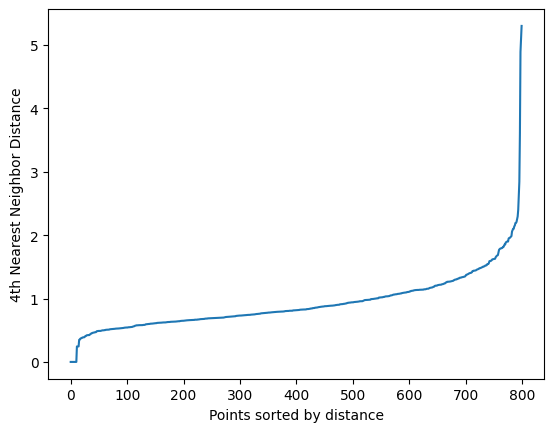

In [58]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Sort distances to the 4th nearest neighbor
distances = np.sort(distances[:, 3])

plt.figure()
plt.plot(distances)
plt.xlabel("Points sorted by distance")
plt.ylabel("4th Nearest Neighbor Distance")
plt.show()


What is your chosen eps based on the "elbow"? (2 pts)

In [59]:
# Chosen eps value (example – adjust based on elbow)
eps = 1.2
eps

1.2

One-sentence explanation of your reasoning (2 pts)

The eps value was chosen at the elbow point of the k-distance graph where distances begin increasing rapidly.

## 5. Run DBSCAN (10 points)

Run DBSCAN using your chosen eps and min_samples


In [60]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=eps, min_samples=4)
labels = dbscan.fit_predict(X_scaled)


How many clusters did DBSCAN find? (4 pts)

4

In [61]:
# Number of clusters (excluding noise)
len(set(labels)) - (1 if -1 in labels else 0)


4

How many Pokémon were labeled as noise? (4 pts)

In [62]:
# Number of noise points
list(labels).count(-1)


104

Show the unique labels output by DBSCAN (2 pts)

In [63]:
# Unique labels
set(labels)


{np.int64(-1), np.int64(0), np.int64(1), np.int64(2), np.int64(3)}

## 6. Attach Cluster Labels to the Original Dataset (7 points)

Add the cluster labels back to the original DataFrame (3 pts)

In [64]:
df_clean = df.loc[X.index].copy()
df_clean['Cluster'] = labels

Show the first 10 rows including the cluster label (4 pts)

In [65]:
# Show first 10 rows
df_clean.head(10)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Cluster
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,0
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,0
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,0
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,0
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,0
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,0


## 7. Explore the Clusters (12 points)

For each cluster:


How many Pokémon does it contain? (4 pts)

In [66]:
# Pokémon count per cluster
df_clean['Cluster'].value_counts()


,count
Cluster,
0,681
-1,104
1,5
3,5
2,5


What are the average Attack, Defense, and Speed? (4 pts)


In [67]:
# Average stats per cluster
df_clean.groupby('Cluster')[['Attack', 'Defense', 'Speed']].mean()


,Attack,Defense,Speed
Cluster,,,
-1,96.269231,91.923077,74.798077
0,76.240822,70.111601,67.114537
1,56.400000,152.600000,46.000000
2,65.000000,107.000000,86.000000
3,132.400000,94.000000,95.600000


Compare the clusters: What differences do you notice? (4 pts)

Some clusters group fast, offensive Pokémon, while others contain bulkier, defensive Pokémon. Noise points tend to have extreme or unusual stat combinations.

## 8. Identify Outliers (10 points)

List all Pokémon labeled as noise (cluster = -1) (4 pts)

In [68]:
# Pokémon labeled as noise
outliers = df_clean[df_clean['Cluster'] == -1]
outliers[['Name', 'HP', 'Attack', 'Defense', 'Speed']]


,Name,HP,Attack,Defense,Speed
19,BeedrillMega Beedrill,65,150,40,145
44,Jigglypuff,115,45,20,20
45,Wigglytuff,140,70,45,45
55,Diglett,10,55,25,95
68,Abra,25,20,15,90
...,...,...,...,...,...
789,Avalugg,95,117,184,28
795,Diancie,50,100,150,50
796,DiancieMega Diancie,50,160,110,110
797,HoopaHoopa Confined,80,110,60,70


Are many of them legendary? (3 pts)

In [69]:
# Check legendary status
outliers['Legendary'].value_counts()

,count
Legendary,
False,78
True,26


Explain why DBSCAN might classify them as outliers (3 pts)

DBSCAN classifies these Pokémon as outliers because their stat distributions are very different from dense groups, often due to extremely high or low base stats.

## 9. Interpret the Clustering Results (25 points)
Write a short interpretation (4–6 sentences).
Discuss:


What types of Pokémon grouped together (5 pts)

Pokémon with similar base stat distributions, such as fast attackers or bulkier defensive Pokémon, were grouped together into the same clusters by DBSCAN.

Whether the clusters make intuitive sense (10 pts)

The clusters make intuitive sense because Pokémon that serve similar battle roles tend to have comparable Attack, Defense, and Speed values, which DBSCAN successfully identified as dense regions in the data.


What the noise points reveal about DBSCAN (5 pts)


The noise points show that DBSCAN is effective at identifying Pokémon that do not belong to any dense cluster, particularly those with extreme or unusual stat combinations.

What stat patterns you discovered (5 pts)

The clustering revealed clear stat patterns, such as high-Speed Pokémon forming separate groups from slower, defense-oriented Pokémon, while Pokémon with balanced stats tended to cluster together.